In [ ]:
# Code by Kelvin Huynh

# Data Source:
#    The data sources utilized within this report come from https://opendata.dc.gov, where data represents the Washington D.C. 
#    area. Specifically, there were 5 datasets utilized for the first part of the analysis, and are the following:
#       https://opendata.dc.gov/datasets/building-permits-in-2013
#       https://opendata.dc.gov/datasets/building-permits-in-2014
#       https://opendata.dc.gov/datasets/building-permits-in-2015
#       https://opendata.dc.gov/datasets/building-permits-in-2016
#       https://opendata.dc.gov/datasets/building-permits-in-2017
#    The second part of the analysis come froms the following:
#       https://planning.dc.gov/page/american-community-survey-acs-estimates (file name: 2013-2017 ACS 5-Year Ward.xls)

# Variables utilized from these datasets:
#    LONGITUDE: longitude coordinate (number)
#    LATITUDE: latitude coordinate (number)
#    PERMIT_SUBTYPE_NAME: name of subtype of building permit (string)
#    Professional, scientific, and management, and administrative and waste management services: percentage of population
#       that work in any of the above career professions, by ward sector (float)

# Goal: 
#    Understand the relationship between ward sector numbers and the number of solar system building permits in the Washington
#    D.C. area. For instance, if there are more solar system building permits in certain ward sectors versus others (or vice
#    versa), try to figure out why that is. This could be investgated by cross-referencing the building permits datasets and
#    the American Community Survey (ACS), which contains data for each D.C. ward sector (about economic, social, demographic,
#    etc.) In particular, this analysis focuses on the economic data from the survey data.

# Motivation for goal:
#    Solar energy can help reduce carbon footprint if the method is used by the majority of people, but the technology isn't 
#    implemented everywhere by everyone just yet. Within the dataset has a column (e.g. variable) labeled 'PERMIT_SUBTYPE_NAME'
#    and one of the values of the column is 'SOLAR SYSTEM', representing the building permits that deal with solar energy/cells.
#    If we could connect certain attributes of a D.C. Ward sector to the amount of solar system building permits, we could 
#    figure out what makes solar energy more implemented and make changes to push towards more awareness/usage.

In [55]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [192]:
# reading in csv files to use for data analysis

# building permits 2013 - 2017
building_permits_2013 = pd.read_csv('C:/Users/kh123/Python Stuff/INST447 Final Project Report/Building_permits_in_2013.csv', index_col=None)
building_permits_2014 = pd.read_csv('C:/Users/kh123/Python Stuff/INST447 Final Project Report/Building_permits_in_2014.csv', index_col=None)
building_permits_2015 = pd.read_csv('C:/Users/kh123/Python Stuff/INST447 Final Project Report/Building_permits_in_2015.csv', index_col=None)
building_permits_2016 = pd.read_csv('C:/Users/kh123/Python Stuff/INST447 Final Project Report/Building_permits_in_2016.csv', index_col=None)
building_permits_2017 = pd.read_csv('C:/Users/kh123/Python Stuff/INST447 Final Project Report/Building_permits_in_2017.csv', index_col=None)

# ward dataset
ward_data = pd.ExcelFile('C:/Users/kh123/Python Stuff/INST447 Final Project Report/2013-2017 ACS 5-Year Ward.xls')
# extracting just the 'Economic' sheet from the overall dataset
econ_data = pd.read_excel(test, '2013-17 Economic_Ward ')

In [42]:
# merging building permits set 2013 - 2017 into one 
merged_permits_2013_to_2017 = pd.concat([building_permits_2013, building_permits_2014])
merged_permits_2013_to_2017 = pd.concat([merged_permits_2013_to_2017, building_permits_2015])
merged_permits_2013_to_2017 = pd.concat([merged_permits_2013_to_2017, building_permits_2016])
merged_permits_2013_to_2017 = pd.concat([merged_permits_2013_to_2017, building_permits_2017])

# display merged building permits dataframe
merged_permits_2013_to_2017

,X,Y,OBJECTID,DCRAINTERNALNUMBER,ISSUE_DATE,PERMIT_ID,PERMIT_TYPE_NAME,PERMIT_SUBTYPE_NAME,PERMIT_CATEGORY_NAME,APPLICATION_STATUS_NAME,...,WARD,ANC,SMD,DISTRICT,PSA,NEIGHBORHOODCLUSTER,HOTSPOT2006NAME,HOTSPOT2005NAME,HOTSPOT2004NAME,BUSINESSIMPROVEMENTDISTRICT
0,-77.014740,38.872222,456499307,251304569,2013-04-26T00:00:00.000Z,P1304569,SUPPLEMENTAL,PLUMBING AND GAS,NaN,PERMIT ISSUED,...,6,6D,6D05,FIRST,105,Cluster 9,NaN,NaN,NaN,NaN
1,-77.014875,38.872216,456499308,251304570,2013-04-26T00:00:00.000Z,P1304570,SUPPLEMENTAL,PLUMBING AND GAS,NaN,PERMIT ISSUED,...,6,6D,6D05,FIRST,105,Cluster 9,NaN,NaN,NaN,NaN
2,-77.014966,38.872231,456499309,251304571,2013-04-26T00:00:00.000Z,P1304571,SUPPLEMENTAL,PLUMBING AND GAS,NaN,PERMIT ISSUED,...,6,6D,6D05,FIRST,105,Cluster 9,NaN,NaN,NaN,NaN
3,-77.021713,38.915147,456499310,251304574,2013-04-26T00:00:00.000Z,P1304574,SUPPLEMENTAL,PLUMBING AND GAS,NaN,PERMIT ISSUED,...,1,1B,1B01,THIRD,306,Cluster 3,NaN,NaN,NaN,NaN
4,-77.032276,38.897694,456499311,251304575,2013-04-26T00:00:00.000Z,P1304575,SUPPLEMENTAL,PLUMBING AND GAS,NaN,PERMIT ISSUED,...,2,2C,2C01,SECOND,207,Cluster 8,NaN,NaN,NaN,Downtown BID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48302,-76.931799,38.888110,456495284,221800479,2017-11-16T00:00:00.000Z,M1800479,SUPPLEMENTAL,MECHANICAL,NaN,PERMIT ISSUED,...,7,7E,7E05,SIXTH,604,Cluster 33,NaN,NaN,NaN,NaN
48303,-76.996001,38.881050,456495285,221800510,2017-11-17T00:00:00.000Z,M1800510,SUPPLEMENTAL,MECHANICAL,NaN,PERMIT ISSUED,...,6,6B,6B03,FIRST,106,Cluster 26,NaN,NaN,NaN,Capitol Hill BID
48304,-76.987672,38.905005,456495286,251801529,2017-11-27T00:00:00.000Z,P1801529,SUPPLEMENTAL,PLUMBING AND GAS,NaN,COMPLETED,...,5,5D,5D06,FIFTH,506,Cluster 23,NaN,NaN,NaN,NaN
48305,-77.067986,38.906938,456495287,251801535,2017-11-27T00:00:00.000Z,P1801535,SUPPLEMENTAL,PLUMBING AND GAS,NaN,COMPLETED,...,2,2E,2E03,SECOND,206,Cluster 4,NaN,NaN,NaN,NaN


In [45]:
# get subset of new merged dataframe to only have rows that contain the 'SOLAR SYSTEM' permit subtype name
solar_rows = merged_permits_2013_to_2017[merged_permits_2013_to_2017['PERMIT_SUBTYPE_NAME'] == 'SOLAR SYSTEM']

# display rows for reference
solar_rows

,X,Y,OBJECTID,DCRAINTERNALNUMBER,ISSUE_DATE,PERMIT_ID,PERMIT_TYPE_NAME,PERMIT_SUBTYPE_NAME,PERMIT_CATEGORY_NAME,APPLICATION_STATUS_NAME,...,WARD,ANC,SMD,DISTRICT,PSA,NEIGHBORHOODCLUSTER,HOTSPOT2006NAME,HOTSPOT2005NAME,HOTSPOT2004NAME,BUSINESSIMPROVEMENTDISTRICT
23695,-76.976752,38.851379,456776912,2824211500004,2015-08-05T00:00:00.000Z,SOL1500004,CONSTRUCTION,SOLAR SYSTEM,NaN,COMPLETED,...,8,8E,8E02,SEVENTH,704,Cluster 38,NaN,NaN,NaN,NaN
23696,-76.975105,38.866184,456776913,2824211500005,2015-08-05T00:00:00.000Z,SOL1500005,CONSTRUCTION,SOLAR SYSTEM,NaN,PERMIT ISSUED,...,8,8A,8A03,SIXTH,607,Cluster 34,NaN,NaN,NaN,NaN
23697,-76.983946,38.912996,456776914,2824211500007,2015-08-05T00:00:00.000Z,SOL1500007,CONSTRUCTION,SOLAR SYSTEM,NaN,COMPLETED,...,5,5D,5D01,FIFTH,506,Cluster 23,NaN,NaN,NaN,NaN
23698,-76.972553,38.937058,456776915,2824211500008,2015-08-05T00:00:00.000Z,SOL1500008,CONSTRUCTION,SOLAR SYSTEM,NaN,PERMIT ISSUED,...,5,5C,5C01,FIFTH,503,Cluster 24,NaN,NaN,NaN,NaN
28468,-76.981193,38.898246,456791086,2824211500006,2015-08-12T00:00:00.000Z,SOL1500006,CONSTRUCTION,SOLAR SYSTEM,NaN,PERMIT CANCELED,...,6,6A,6A07,FIFTH,507,Cluster 25,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48021,-76.995200,38.903932,456493295,2824211800138,2017-12-14T00:00:00.000Z,SOL1800138,CONSTRUCTION,SOLAR SYSTEM,NaN,COMPLETED,...,6,6C,6C06,FIFTH,501,Cluster 25,NaN,NaN,NaN,NaN
48028,-77.024324,38.908400,456493524,2824211700804,2017-11-21T00:00:00.000Z,SOL1700804,CONSTRUCTION,SOLAR SYSTEM,NaN,PERMIT ISSUED,...,2,2F,2F06,THIRD,307,Cluster 7,NaN,NaN,NaN,NaN
48060,-77.016084,38.944101,456493822,2824211800080,2017-11-21T00:00:00.000Z,SOL1800080,CONSTRUCTION,SOLAR SYSTEM,NaN,PERMIT ISSUED,...,4,4C,4C10,FOURTH,407,Cluster 18,NaN,NaN,NaN,NaN
48203,-77.047536,38.913615,456496736,2824211800116,2017-12-08T00:00:00.000Z,SOL1800116,CONSTRUCTION,SOLAR SYSTEM,NaN,COMPLETED,...,2,2D,2D02,SECOND,208,Cluster 1,NaN,NaN,NaN,NaN


In [52]:
# group the 'solar system' permit subtype rows together to get a number count per WARD 
solar_groupby_ward = solar_rows.groupby(['WARD']).count()

# get coordinates into a dataframe to use later for geographical heatmap
coords = ((solar_rows.LONGITUDE.min(), solar_rows.LONGITUDE.max(), solar_rows.LATITUDE.min(), solar_rows.LATITUDE.max()))

# dropping all columns but one (as all values in the columns are now the number of solar system permit per WARD)
solar_groupby_ward = solar_groupby_ward[['X']]

# rename column for context
solar_groupby_ward.columns = ['Total number of solar system subtype permits']

# display dataframe for reference
solar_groupby_ward

,Total number of solar system subtype permits
WARD,
1,147
2,48
3,127
4,317
5,291
6,240
7,317
8,200


Text(0.5, 1.0, 'Number of Solar System Building Permits Per D.C. Ward Sector')

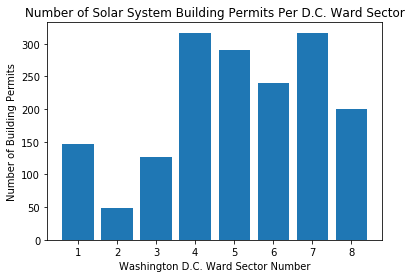

In [114]:
# bar plot for 'solar system' building permits per ward sector in Washington D.C.
plt.bar(solar_groupby_ward.index, solar_groupby_ward['Total number of solar system subtype permits'])
plt.xlabel('Washington D.C. Ward Sector Number')
plt.ylabel('Number of Building Permits')
plt.title('Number of Solar System Building Permits Per D.C. Ward Sector')

In [85]:
# bringing in DC image
DC_map = plt.imread('C:/Users/kh123/Python Stuff/INST447 Final Project Report/DC_Image.png')

# bringing in ward sectors of DC image
ward_map = plt.imread('C:/Users/kh123/Python Stuff/INST447 Final Project Report/ward_sectors.png')

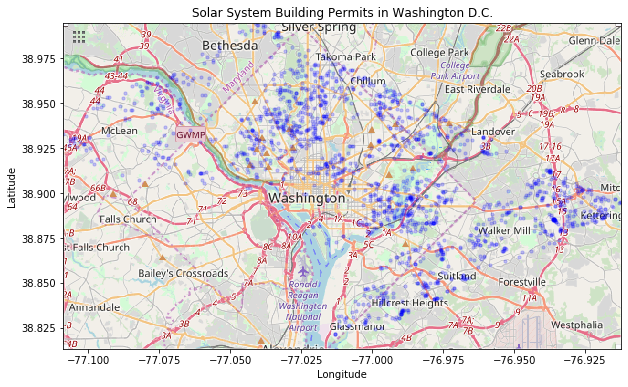

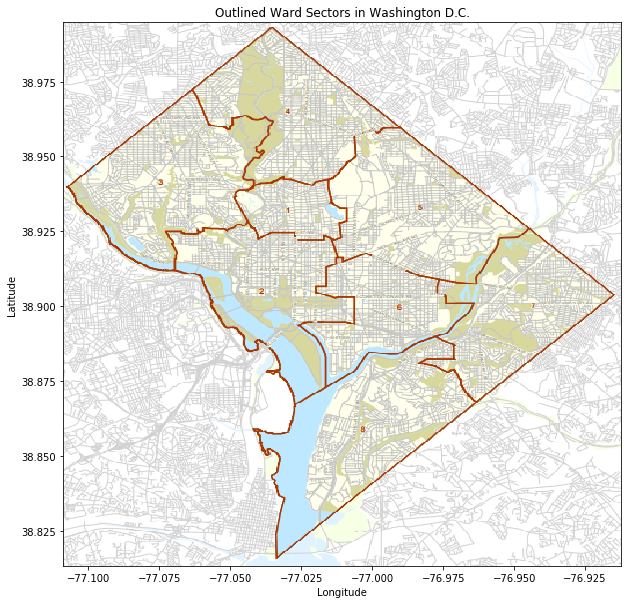

In [167]:
# creating visual for solar system building permits located in DC
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(solar_rows.LONGITUDE, solar_rows.LATITUDE, alpha= 0.2, c='b', s=10)
ax.set_title('Solar System Building Permits in Washington D.C.')
ax.set_xlim(coords[0],coords[1])
ax.set_ylim(coords[2],coords[3])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.imshow(DC_map, extent = coords, aspect = 'auto')

# creating visual for ward outlined sectors in DC
fig, bx = plt.subplots(figsize = (10, 10))
bx.set_title('Outlined Ward Sectors in Washington D.C.')
bx.set_xlim(coords[0], coords[1])
bx.set_ylim(coords[2], coords[3])
bx.set_xlabel('Longitude')
bx.set_ylabel('Latitude')
bx.imshow(ward_map, extent = coords, aspect = 'auto')

# Source for geographical heat map help for visual creation:
# https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

In [173]:
# below is just the economic sheet from the D.C. Ward dataset (the overall dataset containing multiple sheets (like social, 
# economic, and demographic data)
# (NOTE: the code to extract just this single sheet of data is at the top with reading of all the datasets)
econ_data

,DP03: SELECTED ECONOMIC CHARACTERISTICS IN THE DISTRICT OF COLUMBIA,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2013-2017 American Community Survey 5-Year Est...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Subject,Ward 1,NaN,Ward 2,NaN,Ward 3,NaN,Ward 4,NaN,Ward 5,NaN,Ward 6,NaN,Ward 7,NaN,Ward 8,NaN
2,NaN,Estimate,Percent,Estimate,Percent,Estimate,Percent,Estimate,Percent,Estimate,Percent,Estimate,Percent,Estimate,Percent,Estimate,Percent
3,EMPLOYMENT STATUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Population 16 years and over,73861,73861,73759,73759,71683,71683,69045,69045,72938,72938,79004,79004,62981,62981,61344,61344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,18 years and over,(X),0.11,(X),0.146,(X),0.095,(X),0.11,(X),0.169,(X),0.124,(X),0.224,(X),0.305
165,18 to 64 years,(X),0.102,(X),0.148,(X),0.11,(X),0.105,(X),0.167,(X),0.121,(X),0.233,(X),0.313
166,65 years and over,(X),0.183,(X),0.13,(X),0.036,(X),0.129,(X),0.178,(X),0.142,(X),0.179,(X),0.246
167,People in families,(X),0.124,(X),0.043,(X),0.018,(X),0.08,(X),0.116,(X),0.12,(X),0.253,(X),0.344


In [193]:
# variable to extract one row from the Economic sheet from earlier imported dataset from above
# row is 'Professional, scientific, and management, and administrative and waste management services' from Industry section
econ_data = econ_data.loc[[55]]
# only use the columns that represent the percentage of people in wards 1-8 that work within the above industry
econ_data = econ_data[['Unnamed: 2', 'Unnamed: 4', 'Unnamed: 6', 'Unnamed: 8', 'Unnamed: 10', 'Unnamed: 12', 'Unnamed: 14', 'Unnamed: 16']]
# rename the columns ward # 1-8
econ_data.columns = ['1', '2', '3', '4', '5', '6', '7', '8']
# transpose the dataframe
econ_data = econ_data.transpose()
# rename column
econ_data.columns = ['Percentage of People in Industry']
# give index column a name
econ_data.index.name = 'WARD'
# converting column from type object to type float (for graphic purposes; needs to be numeric)
econ_data['Percentage of People in Industry'] = econ_data['Percentage of People in Industry'].astype(float)
# multiply each decimal in dataframe by 100 to get percentage value
econ_data[econ_data.select_dtypes(include=['number']).columns] *= 100
# display current dataframe
econ_data

,Percentage of People in Industry
WARD,
1,25.1
2,30.3
3,27.3
4,21.4
5,17.9
6,26.0
7,15.3
8,15.3


Text(0.5, 1.0, 'Percentage of People in Professional, Scientific Management, Administrative, or Waste Management Industry Per Ward')

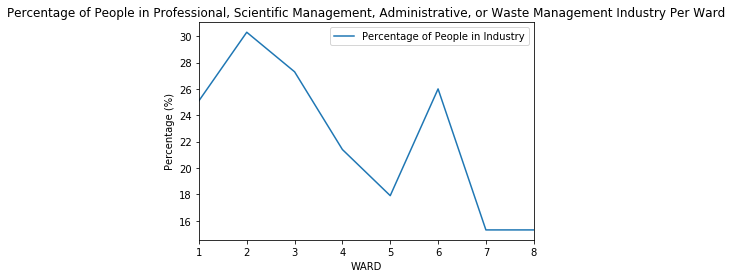

In [197]:
# line plot of percentage of people in each D.C. ward (1-8) that are in professional, scientific management, 
# adminstrative, or waste management industry
econ_data.plot.line()
plt.ylabel('Percentage (%)')
plt.title('Percentage of People in Professional, Scientific Management, Administrative, or Waste Management Industry Per Ward')

In [198]:
# Code for saving csvs used for analysis to computer for reference

# dataset used for initial solar system subtype permits per ward
solar_system_permits_by_ward = solar_groupby_ward.to_csv(r'C:/Users/kh123/Python Stuff/INST447 Final Project Report/solar_system_permits_by_ward.csv', index = None, header=True)
# dataset uesd for geographical heat map
solar_system_type_permits = solar_rows.to_csv(r'C:/Users/kh123/Python Stuff/INST447 Final Project Report/solar_system_subtype_permits.csv', index = None, header=True)
# dataset used for line plot analysis of a certain career per ward
career_econ_data = econ_data.to_csv(r'C:/Users/kh123/Python Stuff/INST447 Final Project Report/career_econ_data.csv', index = None, header=True)

# when the below code is run, csv files will be created to path
solar_system_permits_by_ward
solar_system_type_permits
career_econ_data

In [ ]:
# Discussion:
#    The intent of the analysis was to determine a relationship between Washington D.C. ward sectors and the number of 
#    'solar system' building permits, with the intent of understanding how various attributes affect this particular
#    relationship. The table with 'WARD' and 'Total number of solar system subtype permits' columns reveals that ward sector
#    #2 has a drastically low number of building permits associated with solar, with a low of 48. Another intent was to look
#    at certain ward sectors that had a large number of permits and look for attributes that may have lead to such large 
#    numbers. 

#   A geographical heatmap of all the subtype 'solar system' building permits from 2013 to 2017 was created to shown the 
#   distribution of permits across the D.C. area. A picture of D.C. with its ward sectors outlined is below the heatmap. When
#   analyzing the two next to one another, the low number of permits for ward 2 is visualized. Ward 2 is the leftmost middle 
#   outlined section (denoted by the image) and when looking at the heatmap, ward sector 2 is a bald spot. The new intention
#   is to figure out what sort of attributes could be factors affecting the number of permits measurement.

#   There was a focus on industry/profession of ward sectors to see if career paths had any effect in the decision of the
#   increase (or lack of) of 'solar system' building permits. In particular, one of the categories in the data named
#   'Professional, scientific, and management, and administrative and waste management services' is found attractive; these
#   career paths deal a lot with being a factor in carbon emissions and footprint. The idea is to see if there's any pattern
#   or points of relation to pinpoint back to why ward 2 has such a low number of solar system building permits.

#   Through found percentages and respective line plot, it reveals that ward 2 had the highest number of its population within
#   the 'Professional, scientific, and management, and administrative and waste management services' industry. This contradicts
#   the common notion that if a population had a large number in careers that (could) deal with reducing emissions, there would
#   be more activity in lessening said emissions (e.g. solar system technology). However, with ward 2 having the highest 
#   percentage of people within this mentioned career industry, the ward is with the lowest number of solar building permits.
#   It is likely to say an analysis of ward-wide career path in regards to number of 'solar system' building permits
#   isn't a conclusive one; in that, career isn't a viable variable that can be utilized to figure out why ward 2 has such a 
#   low number for permits.

In [ ]:
# Limitations:
#   One limitation that was overlooked within this analysis is the variable of time. With solar energy being more of a 
#   commonality, it would be interesting to see the data of solar system implementation pop up (an increasing number of usage
#   over time) and seeing it for every ward sector. This could either be a visual representation, with looking at the 
#   map getting progressively darker as the years go by, seeing which area develops the inclusion of solar faster than others.

#   Another limitation has to be with the conclusion of the analysis. It concluded with a conclusive say in what variable isn't
#   viable in analyzing alongside the number of 'solar system' building permits. It doesn't answer the original intention
#   of finding what variable is correlated to the number of permits, just shows a data analysis of what particular variable
#   wouldn't need to be check/analyzed for future analyses. Even then, correlation is not causation and so more analysis 
#   would have to be done to 100% conclusively consider any findings to be true.

In [ ]:
# Conclusion:
#    Solar technology will (or rather, is) a big innovation to how the world will work. There is an obvious disconnect of ward 
#    2 from all the other wards in the Washington D.C. area, in that ward 2 has a significantly lower number of 'solar system'
#    building permits. 

#    In conclusion, we cannot say what variables in particular affect the increase (or decrease) in number of 'solar system' 
#    building permits around the Washington D.C. area (e.g. ward sectors), or the total number of these permits. What we can 
#    say is that variables dealing with career might not be the best indicators. To note, correlation is not causation, and so
#    further analysis is needed to make a significant and true statement.